In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Define subreddits
labeled_subreddits = ["adhd", "anxiety", "bipolar", "bpd", "depression", "ocd", "ptsd"]
none_subreddits = ["jokes", "love", "happy"]
all_subreddits = labeled_subreddits + none_subreddits

In [3]:
# Define custom intervals (in days)
interval_dict = {
    "adhd": 30, "anxiety": 30, "bipolar": 18, "bpd": 30,
    "depression": 26, "ocd": 25, "ptsd": 30,
    "jokes": 30, "love": 30, "happy": 30
}

In [4]:
# Define time range (2020-2023)
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 31)

In [5]:
# Initialize data list and counts
data = []
subreddit_counts = {sub: 0 for sub in all_subreddits}

In [6]:
# Fetch function with score>=10 condition
def fetch_submissions(subreddit, after, before, size=100):
    url = "https://api.pullpush.io/reddit/search/submission/"
    params = {
        "subreddit": subreddit,
        "after": after,
        "before": before,
        "sort": "desc",
        "sort_type": "score",
        "size": size,
        "score": ">10"  # Filter for posts with score >= 10
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        return response.json().get("data", [])
    except requests.exceptions.RequestException as e:
        print(f"Error fetching submissions from r/{subreddit}: {e}")
        return []

In [7]:
# Fetch data with custom intervals
total_intervals = sum((end_date - start_date).days // interval_dict[sub] for sub in all_subreddits)
with tqdm(total=total_intervals, desc="Fetching Data", unit="interval") as pbar:
    for subreddit in all_subreddits:
        interval = timedelta(days=interval_dict[subreddit])
        current_date = start_date
        while current_date <= end_date:
            next_date = current_date + interval
            after_timestamp = int(current_date.timestamp())
            before_timestamp = int(min(next_date, end_date).timestamp())
            
            size = 100 if subreddit in labeled_subreddits else (100 // len(none_subreddits))
            submissions = fetch_submissions(subreddit, after_timestamp, before_timestamp, size)
            
            for submission in submissions:
                created_utc = submission["created_utc"]
                if after_timestamp <= created_utc <= before_timestamp:
                    subreddit_name = submission["subreddit"].lower()
                    title = submission["title"].strip()
                    selftext = submission.get("selftext", "").strip()
                    date_str = datetime.utcfromtimestamp(created_utc).strftime("%Y-%m-%d")
                    combined_text = f"{title}: {selftext}".strip()
                    if len(combined_text.split()) >= 20:
                        label = subreddit_name if subreddit_name in labeled_subreddits else "none"
                        data.append({
                            "label": label,
                            "text": combined_text,
                            "date": date_str
                        })
                        subreddit_counts[subreddit_name] += 1
            
            pbar.update(1)
            current_date += interval
            if current_date <= end_date:
                time.sleep(2)  # Rate limiting

Fetching Data:   8%|▊         | 41/531 [13:43<3:41:31, 27.13s/interval] 

Error fetching submissions from r/adhd: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=adhd&after=1681484400&before=1684076400&sort=desc&sort_type=score&size=100&score=%3E10


Fetching Data:  25%|██▌       | 135/531 [38:33<2:56:05, 26.68s/interval]

Error fetching submissions from r/bipolar: Response ended prematurely


Fetching Data:  32%|███▏      | 169/531 [45:55<1:24:27, 14.00s/interval]

Error fetching submissions from r/bipolar: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=bipolar&after=1686668400&before=1688223600&sort=desc&sort_type=score&size=100&score=%3E10


Fetching Data:  34%|███▍      | 182/531 [49:27<1:15:59, 13.07s/interval]

Error fetching submissions from r/bpd: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=bpd&after=1580396400&before=1582988400&sort=desc&sort_type=score&size=100&score=%3E10


Fetching Data:  59%|█████▉    | 312/531 [1:23:09<1:34:41, 25.94s/interval]

Error fetching submissions from r/ocd: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=ocd&after=1631804400&before=1633964400&sort=desc&sort_type=score&size=100&score=%3E10


Fetching Data:  65%|██████▍   | 344/531 [1:31:00<2:08:42, 41.29s/interval]

Error fetching submissions from r/ocd: Response ended prematurely


Fetching Data:  73%|███████▎  | 389/531 [1:38:41<26:21, 11.13s/interval]  

Error fetching submissions from r/ptsd: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=ptsd&after=1689260400&before=1691852400&sort=desc&sort_type=score&size=100&score=%3E10


Fetching Data:  75%|███████▍  | 397/531 [1:42:03<1:12:17, 32.37s/interval]

Error fetching submissions from r/jokes: Response ended prematurely


Fetching Data:  85%|████████▍ | 450/531 [1:54:33<10:24,  7.72s/interval]  

Error fetching submissions from r/love: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=love&after=1593356400&before=1595948400&sort=desc&sort_type=score&size=33&score=%3E10


Fetching Data:  98%|█████████▊| 523/531 [2:05:57<02:06, 15.76s/interval]

Error fetching submissions from r/happy: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=happy&after=1655564400&before=1658156400&sort=desc&sort_type=score&size=33&score=%3E10


Fetching Data:  99%|█████████▉| 525/531 [2:06:25<01:28, 14.78s/interval]

Error fetching submissions from r/happy: 500 Server Error: Internal Server Error for url: https://api.pullpush.io/reddit/search/submission/?subreddit=happy&after=1660748400&before=1663340400&sort=desc&sort_type=score&size=33&score=%3E10


Fetching Data: 541interval [2:09:02, 14.31s/interval]                   


Original DataFrame shape: (30387, 3)
After removing duplicates shape: (30374, 3)
After removing NaN shape: (30374, 3)

Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30374 entries, 0 to 30373
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   30374 non-null  object
 1   text    30374 non-null  object
 2   date    30374 non-null  object
dtypes: object(3)
memory usage: 712.0+ KB
None
label
adhd          4217
bpd           4111
anxiety       3960
ptsd          3927
bipolar       3575
none          3558
depression    3554
ocd           3472
Name: count, dtype: int64


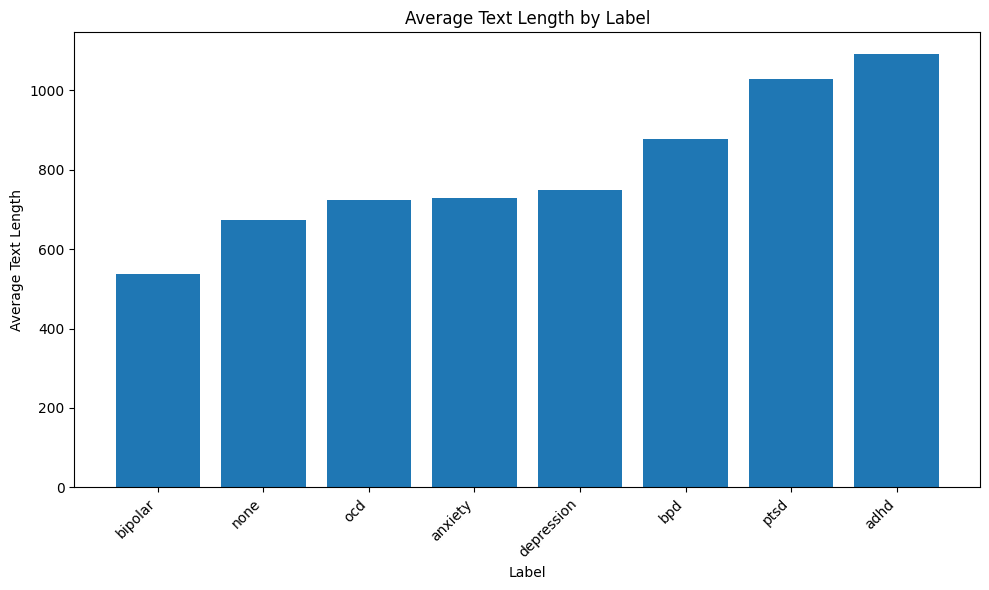

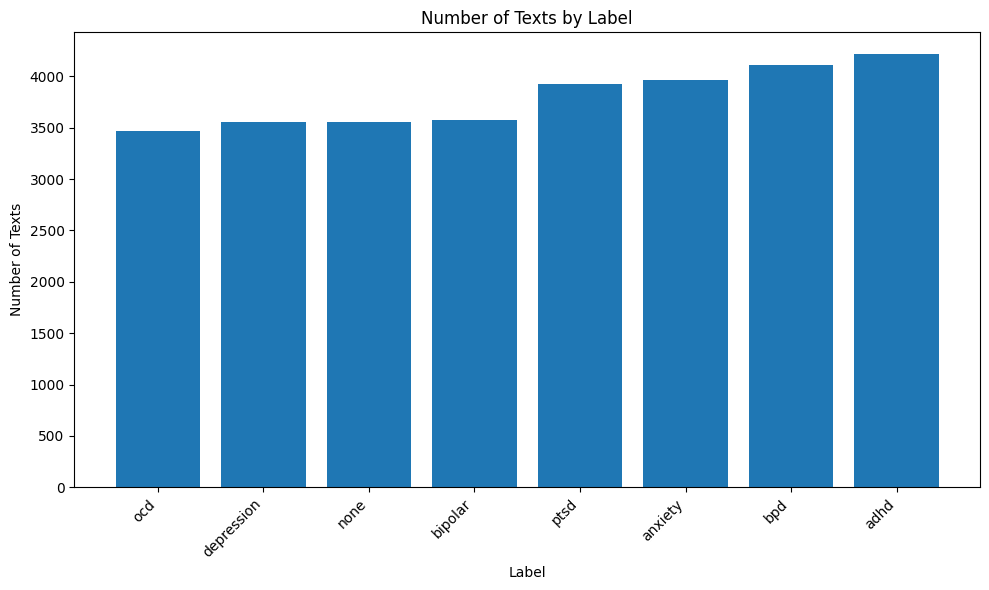


Data fetching complete. Saved 30374 posts to ./reddit_filtered_submissions_balanced_score10.csv.


In [9]:
# Convert to DataFrame and clean
if data:
    df = pd.DataFrame(data)
    
    df = df[
        df['text'].notna() &
        (df['text'] != '[deleted]') &
        (df['text'] != '[removed]') &
        (df['text'].str.strip() != '')
    ]
    print("Original DataFrame shape:", df.shape)
    df.drop_duplicates(inplace=True)
    print("After removing duplicates shape:", df.shape)
    df.dropna(inplace=True)
    print("After removing NaN shape:", df.shape)
    df = df.reset_index(drop=True)
    print("\nCleaned DataFrame info:")
    print(df.info())
    
    print(df["label"].value_counts())
    
    df['text_length'] = df['text'].str.len()
    avg_length = df.groupby('label')['text_length'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    plt.bar(avg_length.index, avg_length.values)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Label')
    plt.ylabel('Average Text Length')
    plt.title('Average Text Length by Label')
    plt.tight_layout()
    plt.show()

    text_count = df.groupby('label').size().sort_values()
    plt.figure(figsize=(10, 6))
    plt.bar(text_count.index, text_count.values)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Label')
    plt.ylabel('Number of Texts')
    plt.title('Number of Texts by Label')
    plt.tight_layout()
    plt.show()
    
    output_path = "./reddit_filtered_submissions_balanced_score10.csv"
    df.to_csv(output_path, index=False, encoding="utf-8-sig")
    print(f"\nData fetching complete. Saved {len(df)} posts to {output_path}.")
else:
    print("\nNo data collected. CSV file not created.")